**Name : Aishwarya Bhavsar** <br>
**CSULB : 029371509**<br>
**CECS 457 - Applied Machine Learning**<br>
**K-means**

# **Import Libraries**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# **Import dataset**

In [20]:
mall_customer_data = pd.read_csv('/content/Mall_Customers.csv')

# **Check the data types and numbers of rows and columns**

In [21]:
mall_customer_data.info

<bound method DataFrame.info of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [22]:
mall_customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
mall_customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **Check missing values**

In [24]:
mall_customer_data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

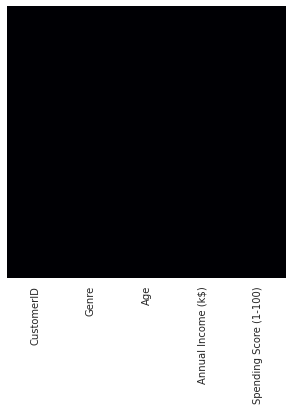

In [45]:
plt.figure(figsize=(5,5))
sns.heatmap(mall_customer_data.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [26]:
x = mall_customer_data.iloc[:, [3, 4]].values

In [27]:
print(x.shape)

(200, 2)


**THE ELBOW METHOD - For selecting the optimal number of clusters.**

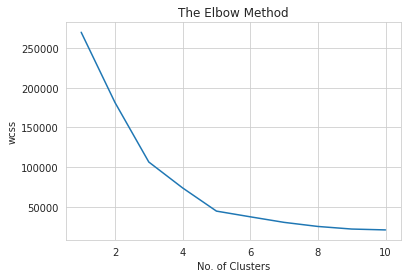

In [28]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)
  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**Implementing the KMeans Algorithm with the optimal no.of Clusters**

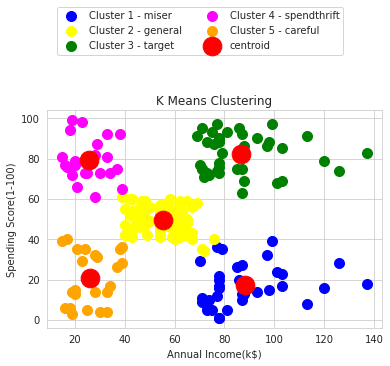

In [43]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'blue', label = 'Cluster 1 - miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2 - general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'green', label = 'Cluster 3 - target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4 - spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'Cluster 5 - careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 350, c = 'red' , label = 'centroid')

plt.title('K Means Clustering')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend(bbox_to_anchor =(0.90, 1.5), ncol = 2)
plt.show()

# **CONCLUSION :**


<b>From the above scatter plot we can visualize different clusters among annual income and total spending scores.<br><br> Total 5 clusters are created in this scatter plot. <br><br> Red points are the centroid of the 5 clusters.<br><br>In cluster 3(green-colored) we see that people have high income and high spending scores, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.